# Predicting Used Car Prices

# Motivation/Problem Statement

The purpose of this model is to accurately predict the price of a used car based on several key attributes and find out which variable/variables have the greatest impact on the price of a used car.

# Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the used car prices dataset

In [ ]:
# Source: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
from google.colab import files
uploaded = files.upload()

Saving used_car_prices.csv to used_car_prices.csv


Store the dataset in a pandas dataframe

In [ ]:
import io
prices = pd.read_csv(io.BytesIO(uploaded['used_car_prices.csv']))
# Dataset is now stored in a Pandas Dataframe
prices.describe()


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


You are allowed to integrate data from other sources if it helps your analysis. In this section, you can check for data completeness and also describe how you are handling missing data (if any).


Checking for null vallues in the data set - because there are none, no measures were taken to handle missing data

In [ ]:
#checks for null values --> No null values in data set
print(prices.isnull().any())

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool


# Exploratory Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
# Check the shape of the dataframe
print(prices.shape)
# Check what variable types there are
print(prices.dtypes)

(10668, 9)
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [ ]:
# Check the summary statistics of the dataset
prices.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### Visualizing all the data stored in the dataset

Average used car prices in relation to various attributes of the car

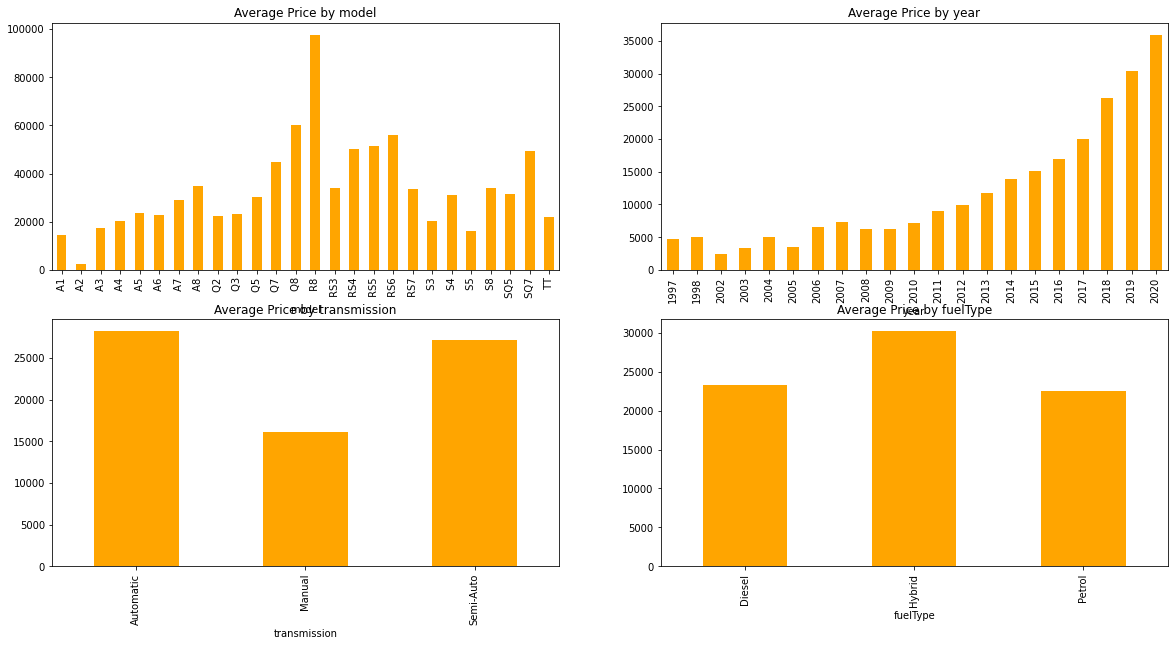

In [ ]:
from matplotlib import pyplot as plt
attribute_list = ['model', 'year', 'transmission', 'fuelType']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(attribute_list):
  row_num = i//2
  col_num = i%2
  prices.groupby(column)['price'].mean().plot(
      kind='bar',
      color='orange',
      # Pass the axes to which we need to add the plot here.
      ax=ax[row_num,col_num],
      title='Average Price by '+ column);

Using a histogram to determine any outliers in the `price` variable


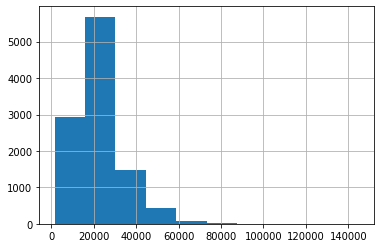

In [ ]:
# Look at the distribution of car prices using a histogram chart.
prices['price'].hist();

A scatterplot depicting individual prices per year

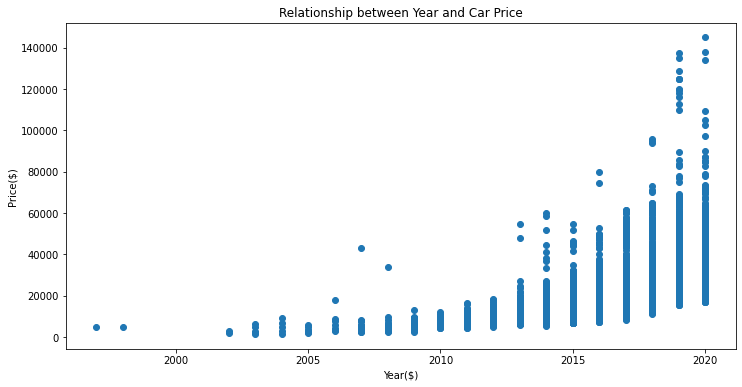

In [ ]:
# Scatterplot between Year and Price
plt.subplots(figsize=(12,6))
plt.scatter(prices['year'], prices['price']);
plt.xlabel('Year($)')
plt.ylabel('Price($)')
plt.title('Relationship between Year and Car Price');

# Model Selection

### Model 1: Polynomial Regression (price vs. year)


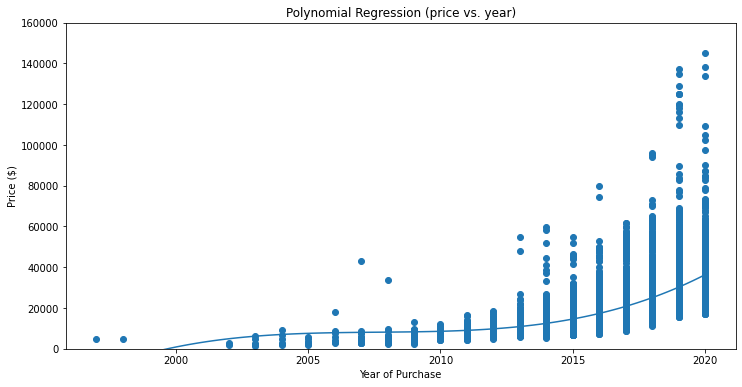

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

x = prices['year']
y = prices['price']

mymodel = np.poly1d(np.polyfit(x, y, 3))
plt.ylim(0, 160000)

myline = np.linspace(1997, 2020, 100)

plt.xlabel('Year of Purchase')
plt.ylabel('Price ($)')
plt.title('Polynomial Regression (price vs. year)')
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

### Model 2: Correlation Matrix

In [ ]:
x = list(prices.columns)
x.pop()

'engineSize'

             year     price   mileage       tax       mpg
year     1.000000  0.583847 -0.790001  0.095719 -0.347985
price    0.583847  1.000000 -0.526981  0.351850 -0.584057
mileage -0.790001 -0.526981  1.000000 -0.167708  0.387835
tax      0.095719  0.351850 -0.167708  1.000000 -0.627232
mpg     -0.347985 -0.584057  0.387835 -0.627232  1.000000


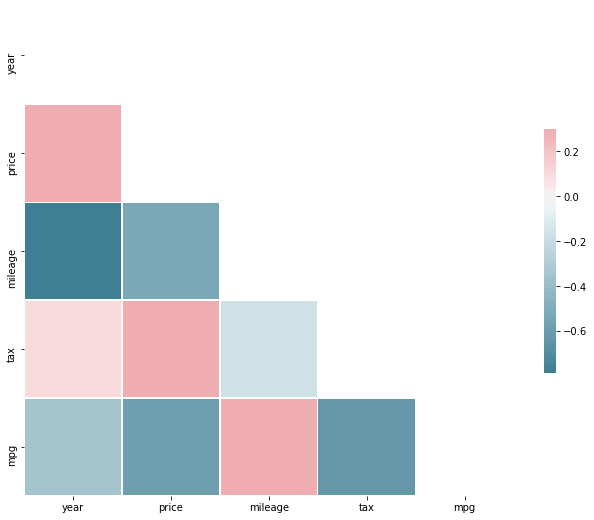

In [ ]:
from sklearn.model_selection import train_test_split

prices_train, prices_test = train_test_split(prices, train_size=0.8, random_state=8)
corr = prices_train.loc[:,x].corr()
print(corr)
f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Specify the color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Model 3: KNN Regression (price vs. year)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
x_train, x_test, y_train, y_test = train_test_split(prices['year'], prices['price'], test_size=0.1, random_state=8)

Determining the best k value to use (by calculating R^2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k_vals = np.arange(1, 500, step=1)

best_k_test = []
for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(np.array(x_train).reshape(-1,1), y_train)
    best_k_test.append(sklearn.metrics.r2_score(y_test, model.predict(np.array(x_test).reshape(-1,1))))
    best_k_value = k_vals[np.argmax(best_k_test)]
print('The best k value is {}'.format(best_k_value))

The best k value is 34


In [ ]:
model = KNeighborsRegressor(n_neighbors=34)
model.fit(np.array(x_train).reshape(-1,1), y_train)
y_pred_test = model.predict(np.array(x_test).reshape(-1,1))


In [ ]:
pd.DataFrame({'price-actual':y_test, 'price-predicted':y_pred_test})

,price-actual,price-predicted
5783,16990,19630.647059
9843,5995,6377.941176
4660,21781,19630.647059
365,20495,30624.882353
1982,13990,18040.058824
...,...,...
2389,12965,18040.058824
8617,21950,19630.647059
10490,36000,30624.882353
6224,24950,30624.882353


Test R2 is 0.431643755259529


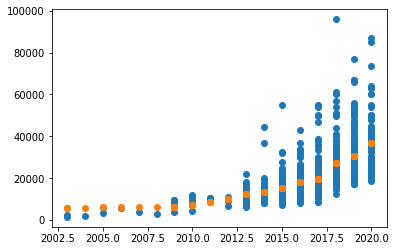

In [ ]:
print('Test R2 is {}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred_test);


# Results and Conclusion

#####Accuracy Check

As seen above, the best R value that we could get from our third model was ~0.43 which means that the correlation between the year and price is moderately strong. It was hard to get a higher R value than this because of the vast amount of data in the data set and the variance that came along with the prices of the used cars.

### Conclusion

The year that a used car was purchased clearly has the strongest impact on the price of a used car. As should be expected, the newer the car, the better the features and less wear and tear it has. However, different car owners have different cars and treat their cars differently than others, which creates a lot of variance in the price of used cars.